# Buyer Profiles

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import seaborn as sns

In [2]:
bid=pd.read_csv('all_bid.csv')
stock=pd.read_csv('all_stock.csv')

/Users/sydneybednar/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (14,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
bid['bid_placed_on']=pd.to_datetime(bid['bid_placed_on'])
stock['submitted_date']=pd.to_datetime(stock['submitted_date'])

## The RealReal

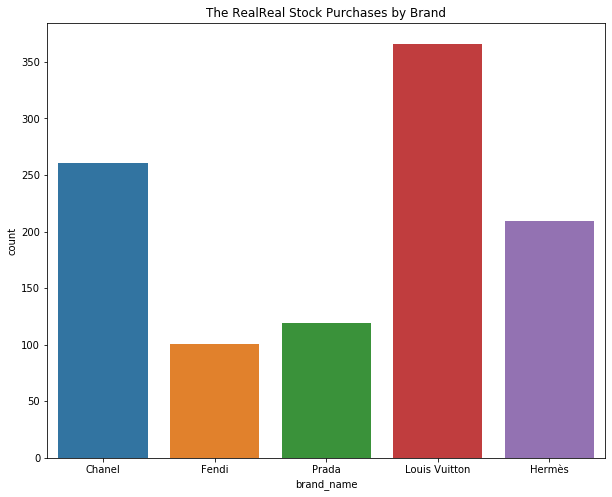

In [5]:
the_rr_s=stock[stock['buyer']=='the realreal'].reset_index()

top_5=list(the_rr_s['brand_name'].value_counts()[:5].index)

plt.figure(figsize=(10,8))
sns.countplot(x=the_rr_s[the_rr_s['brand_name'].isin(top_5)]['brand_name'])
plt.title('The RealReal Stock Purchases by Brand')
plt.show()

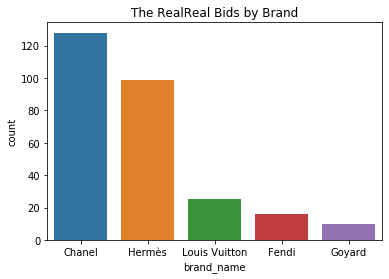

In [6]:
the_rr_b=bid[bid['buyer']=='the realreal'].reset_index()

top_bid=list(the_rr_b['brand_name'].value_counts()[:5].index)

sns.countplot(x=the_rr_b[the_rr_b['brand_name'].isin(top_bid)]['brand_name'])
plt.title('The RealReal Bids by Brand')
plt.show()

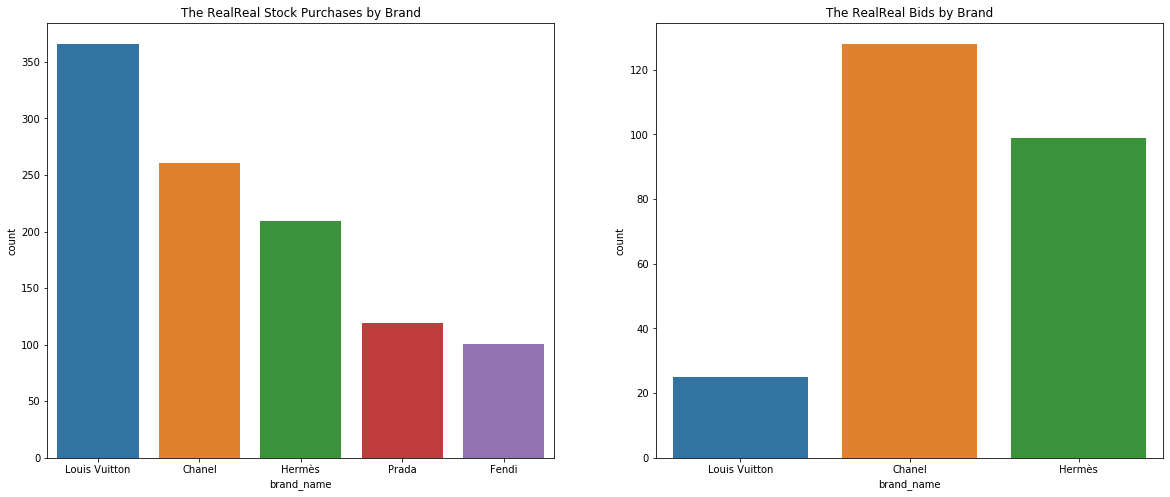

In [7]:
fig,axes=plt.subplots(1,2, figsize=(20,8))

ax1=sns.countplot(x=the_rr_s[the_rr_s['brand_name'].isin(top_5)]['brand_name'],
                  order=['Louis Vuitton', 'Chanel', 'Hermès', 'Prada', 'Fendi'],
                  ax=axes[0]).set(title='The RealReal Stock Purchases by Brand')

ax2=sns.countplot(x=the_rr_b[the_rr_b['brand_name'].isin(top_bid)]['brand_name'],
                  order=['Louis Vuitton', 'Chanel', 'Hermès'],
                  ax=axes[1]).set(title='The RealReal Bids by Brand')

plt.show()

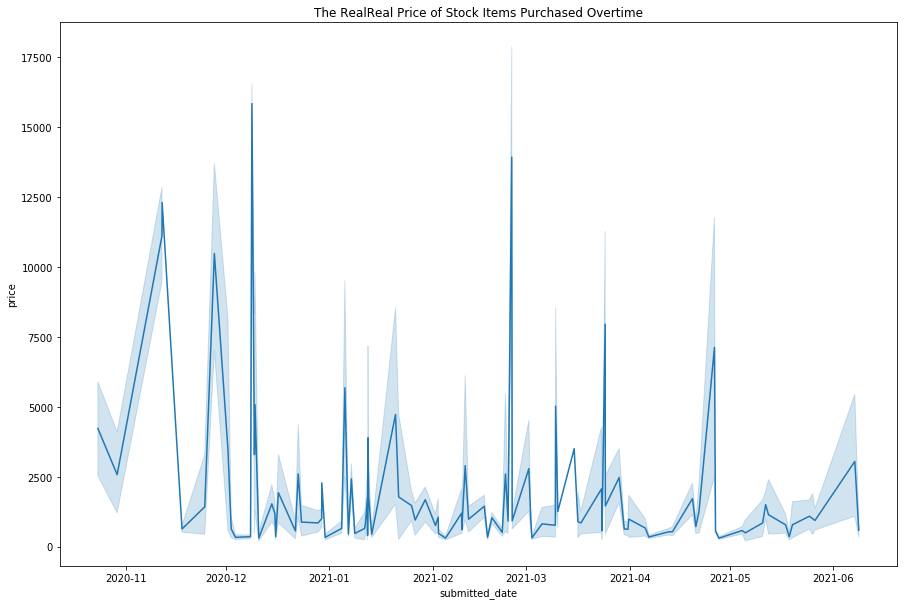

In [9]:
plt.figure(figsize=(15,10))
sns.lineplot(x='submitted_date', y='price', data=the_rr_s) 
plt.title('The RealReal Price of Stock Items Purchased Overtime')
plt.show()

In [10]:
import datetime

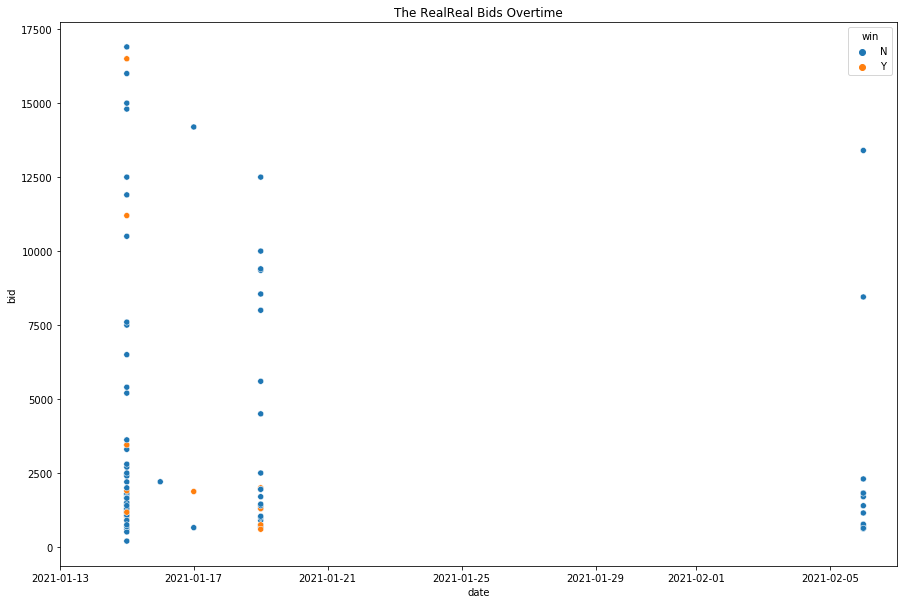

In [12]:
plt.figure(figsize=(15,10))
ax=sns.scatterplot(x='date', y='bid', data=the_rr_b, hue='win') 
plt.title('The RealReal Bids Overtime')
plt.xlim(left=datetime.datetime(2021,1,13), right=datetime.datetime(2021,2,7))
plt.show()

* The RealReal stopped bidding around February 2021. At this time, prices were steadily increasing, and The RealReal continues to buy stock in 2021

In [13]:
the_rr_b['result']='Lost'
the_rr_b.loc[the_rr_b['bid']>=the_rr_b['winning_price'],'result']='Won'

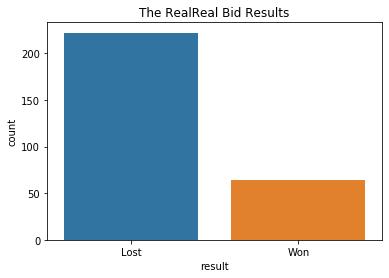

In [14]:
sns.countplot(x=the_rr_b['result'])
plt.title('The RealReal Bid Results')
plt.show()

In [15]:
lost=the_rr_b.groupby('result').count().apply(lambda x: 100*x/x.sum())['index']['Lost']
won=the_rr_b.groupby('result').count().apply(lambda x: 100*x/x.sum())['index']['Won']

print('the realreal lost {:.2f}% of auction bids'.format(lost))
print('the realreal won {:.2f}% of auction bids'.format(won))

the realreal lost 77.62% of auction bids
the realreal won 22.38% of auction bids


**The RealReal's total GMV attribution was 1,220,181.04. However, the company has not bidded since 2/6/21. This may be due to a low win rate of 22.38%. From the charts above, we can see that in stock purchases, The RealReal favors LV, but in auction, the company places more bids on Chanel and Hermès.**

In [99]:
the_rr_b[the_rr_b['result']=='Lost']['within_10'].value_counts()/(153+69)*100

N    68.918919
Y    31.081081
Name: within_10, dtype: float64

In [17]:
all_gmv=pd.read_csv('gmv_2020_2021.csv')

rr_gmv=all_gmv.loc[all_gmv['buyer']=='the realreal']

rr_gmv

,buyer,stock_gmv,auction_gmv,total_gmv,last_bid,last_stock,last_win,stock_last_90,bid_last_90,total_wins,total_bids,win_rate,wins_on_multi_bid,bids_within_10_percent
1,the realreal,2117169.29,230365.0,2347534.29,2021-02-06,2021-05-05,2021-01-19,Y,N,64,286,22.377622,14,69


In [18]:
rr_item=list(the_rr_b.item_id)

In [19]:
def multi_bid(list, bid):
    """
    Returns list of items with multiple bids
    
    Parameter list: the list of item ids
    Precondition: list is a non-empty list
    
    Parameter bid: the dataframe to search
    Precondition: bid is a dataframe with bid history
    """
    items=[]
    for i in list:
        count=bid[bid['item_id']==i].count()[0]
        if count>1:
            items.append(i)
    return items

multi_list=multi_bid(rr_item,bid)

In [20]:
rr_multi_bid=the_rr_b[the_rr_b['item_id'].isin(multi_list)]

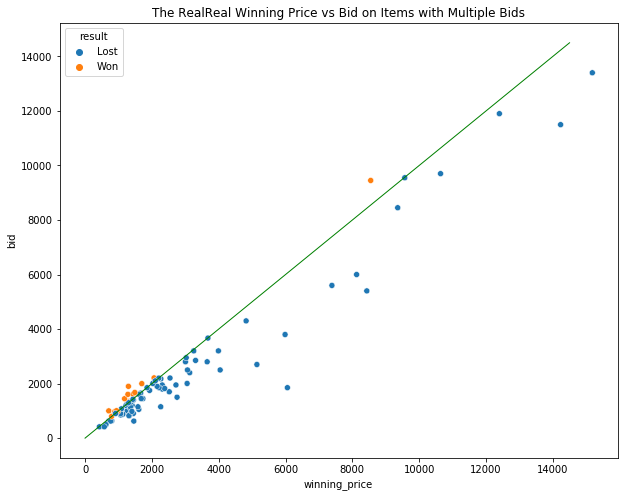

In [21]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='winning_price', y='bid', data=rr_multi_bid, hue='result')
plt.plot([14500, 0], [14500, 0], linewidth=1, color='green')
plt.title('The RealReal Winning Price vs Bid on Items with Multiple Bids')
plt.show()

* The RealReal tends to lose on items with multiple bids

In [108]:
rr_multi_bid['result'].value_counts()/(84+14)*100

Lost    85.714286
Won     14.285714
Name: result, dtype: float64

In [121]:
rr_multi_bid[(rr_multi_bid['result']=='Lost')&(rr_multi_bid['brand_name']=='Hermès')]['title'].value_counts()

Hermès Hermes Birkin 35 Veau Epsom Hand Bag White Silver Metal Fittings R:2014    1
Birkin 30 □ H                                                                     1
Hermès kelly 35 Box calf Rouge H Gold Metal fittings ○V:1992                      1
Hermès Hermes Birkin Birkin 25 Swift handbags                                     1
Gypsier shoulder bag                                                              1
Hermès Birkin 35 Cushbell Gold Gold Metal fittings □F:2002                        1
Hermes Twilly                                                                     1
Hermès Birkin 30 Taurillon Clemence Rose purple SHW C:2018                        1
Hermès Constance 23 Veau Epsom Soleil Silver Metal fittings □B:1998               1
Hermès Birkin 30 Taurillon Clemence Magnolia Shw C:2018                           1
Hermès Birkin 35 Ardennes Black Gold Metal fittings □D:2000                       1
Hermès Jigé Duo Veau Swift Clutch bag Rose azalée A: 2017                   

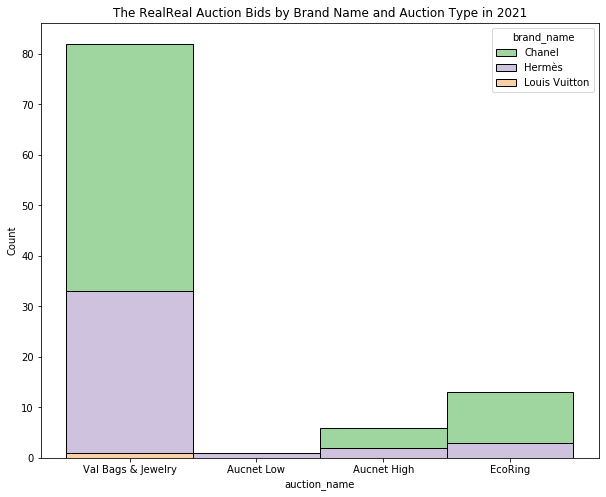

In [118]:
plt.figure(figsize=(10,8))
sns.histplot(x='auction_name', data=the_rr_b[the_rr_b['bid_placed_on'].dt.year==2021], hue='brand_name', multiple='stack',
            palette='Accent')
plt.title('The RealReal Auction Bids by Brand Name and Auction Type in 2021')
plt.show()

## Bag Borrow Steal

In [25]:
bbs_s=stock[stock['buyer']=='bag borrow steal'].reset_index()

bbs_top_5=list(bbs_s['brand_name'].value_counts()[:5].index)


In [26]:
bbs_b=bid[bid['buyer']=='bag borrow steal'].reset_index()

bbs_top_bid=list(bbs_b['brand_name'].value_counts()[:5].index)

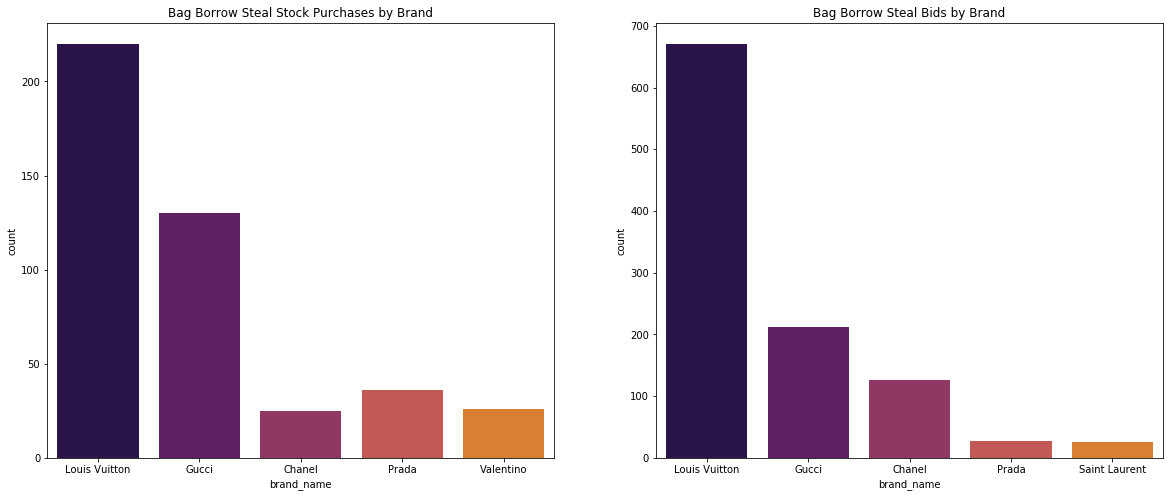

In [27]:
fig,axes=plt.subplots(1,2, figsize=(20,8))

sns.set_palette('inferno')

ax1=sns.countplot(x=bbs_s[bbs_s['brand_name'].isin(bbs_top_5)]['brand_name'],
                  order=['Louis Vuitton', 'Gucci', 'Chanel', 'Prada', 'Valentino'],
                  ax=axes[0]).set(title='Bag Borrow Steal Stock Purchases by Brand')

ax2=sns.countplot(x=bbs_b[bbs_b['brand_name'].isin(bbs_top_bid)]['brand_name'],
                  order=['Louis Vuitton', 'Gucci', 'Chanel', 'Prada', 'Saint Laurent'],
                  ax=axes[1]).set(title='Bag Borrow Steal Bids by Brand')

plt.show()

* BBS favors LV for both stock purchases and auction.

In [29]:
lost=bbs_b.groupby('win').count().apply(lambda x: 100*x/x.sum())['index']['N']
won=bbs_b.groupby('win').count().apply(lambda x: 100*x/x.sum())['index']['Y']

print('bag borrow steal lost {:.2f}% of auction bids'.format(lost))
print('bag borrow steal won {:.2f}% of auction bids'.format(won))

bag borrow steal lost 88.58% of auction bids
bag borrow steal won 11.42% of auction bids


In [126]:
bbs_b[bbs_b['win']=='N']['within_10'].value_counts()/(878+192)*100

N    82.056075
Y    17.943925
Name: within_10, dtype: float64

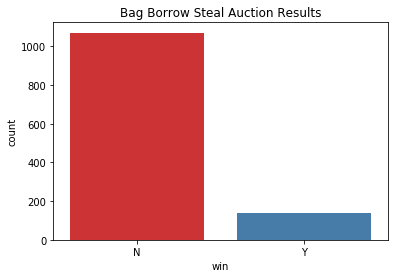

In [31]:
sns.set_palette('Set1')
sns.countplot(x='win', data=bbs_b)
plt.title('Bag Borrow Steal Auction Results')
plt.show()

In [32]:
bbs_b['result']='Lost'
bbs_b.loc[bbs_b['bid']>=bbs_b['winning_price'],'result']='Won'

In [33]:
bbs_item=list(bbs_b.item_id)
bbs_multi_list=multi_bid(bbs_item,bid)
bbs_multi_bid=bbs_b[bbs_b['item_id'].isin(bbs_multi_list)]

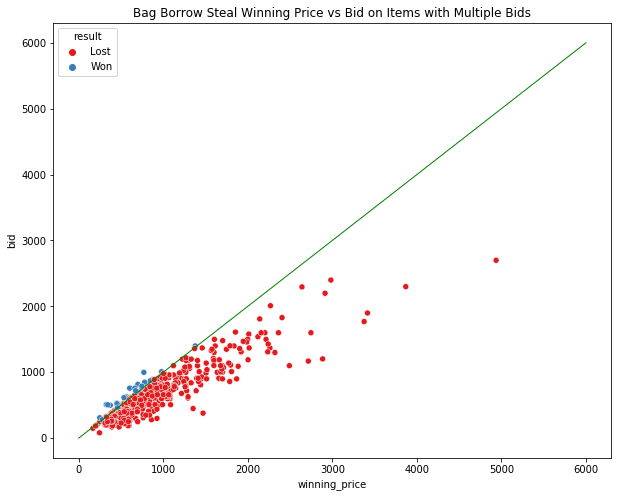

In [34]:
sns.set_palette('Set1')
plt.figure(figsize=(10,8))
sns.scatterplot(x='winning_price', y='bid', data=bbs_multi_bid, hue='result')
plt.plot([6000, 0], [6000, 0], linewidth=1, color='green')
plt.title('Bag Borrow Steal Winning Price vs Bid on Items with Multiple Bids')
plt.show()

* From this chart, BBS loses most bids on items with other bids.

In [130]:
bbs_multi_bid['win'].value_counts()/(34+558)*100

N    94.256757
Y     5.743243
Name: win, dtype: float64

In [132]:
bbs_multi_bid[bbs_multi_bid['win']=='N']['within_10'].value_counts()/(478+80)*100

N    85.663082
Y    14.336918
Name: within_10, dtype: float64

In [138]:
bbs_multi_bid[bbs_multi_bid['win']=='N'][['title','bid','winning_price']].sort_values(by='winning_price', ascending=False)

,title,bid,winning_price
930,Chanel Matelasse Lambskin leather Double flap ...,2699,4937.0
167,Chanel Boy Chain Around Quilted Vintage Calf S...,2299,3869.0
218,Chanel Quilted Lambskin Leather Double Flap Ch...,1899,3416.0
276,Chanel Quilted bag Shoulder Bag,1769,3376.0
278,Chanel Quilted W Flap Chain Shoulder Bag,2399,2983.0
...,...,...,...
1043,Vuitton Monogram Shanti PM shoulder bag,689,NaN
1044,Goyal Goyal Saint Louis PM black pouch tote ba...,829,NaN
1104,Neverfull MM,659,NaN
1116,Zippy Wallet Threes,219,NaN


In [37]:
bbs_lost=bbs_multi_bid[bbs_multi_bid['win']=='N']
bbs_lost['within_10']='N'
bbs_lost.loc[(bbs_lost['bid'])>(bbs_lost['winning_price']*.9), 'within_10']='Y'

/Users/sydneybednar/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sydneybednar/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


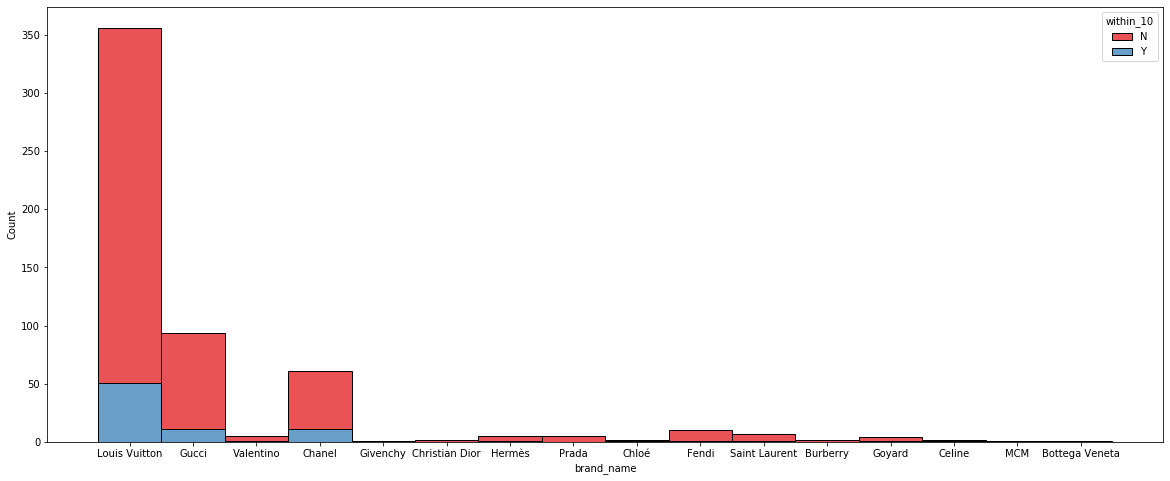

In [38]:
plt.figure(figsize=(20,8))
sns.histplot(x='brand_name', data=bbs_lost, hue='within_10', multiple='stack')
plt.show()

* On auctions lost, BBS usually did not bid within 10% of the winning price.

In [39]:
bbs_lost['within_10'].value_counts()

N    478
Y     80
Name: within_10, dtype: int64

In [139]:
80/(80+478)

0.14336917562724014

In [141]:
bbs_b[bbs_b['bid_placed_on'].dt.year==2021]['win'].value_counts()/(128+918)*100

N    87.762906
Y    12.237094
Name: win, dtype: float64

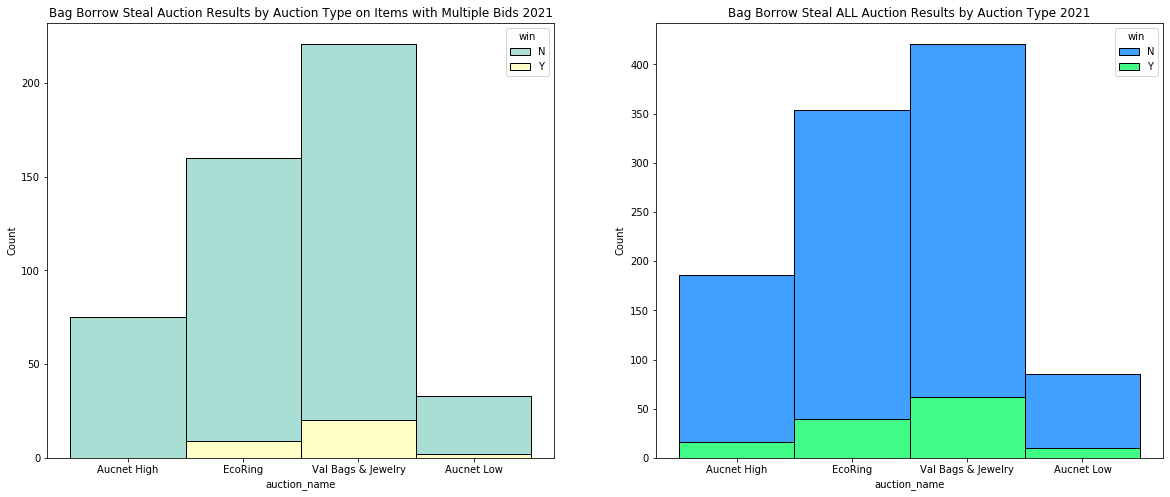

In [43]:
fig,axes=plt.subplots(1,2, figsize=(20,8))

sns.set_palette('Set3')
(sns.histplot(x='auction_name', data=bbs_multi_bid[bbs_multi_bid['bid_placed_on'].dt.year==2021], hue='win', multiple='stack', ax=axes[0])
 .set(title='Bag Borrow Steal Auction Results by Auction Type on Items with Multiple Bids 2021'))

sns.set_palette('gist_ncar')
(sns.histplot(x='auction_name', data=bbs_b[bbs_b['bid_placed_on'].dt.year==2021], hue='win', multiple='stack', ax=axes[1])
 .set(title='Bag Borrow Steal ALL Auction Results by Auction Type 2021'))
plt.show()

* For items with multiple bids, BBS does not have a high win rate for any of the auctions
* BBS has never won an item with multiple bids during Aucnet High
* Overall, BBS does not perform well during auctions, with only a 12.24% win rate
* BBS tends to place more bids in EcoRing and ValBags & Jewelry

In [49]:
bbs_s['submitted_date']=pd.to_datetime(bbs_s['submitted_date'])

month_grp=bbs_s[bbs_s['submitted_date'].dt.year==2021].groupby(bbs_s['submitted_date'].dt.month)['price'].sum()

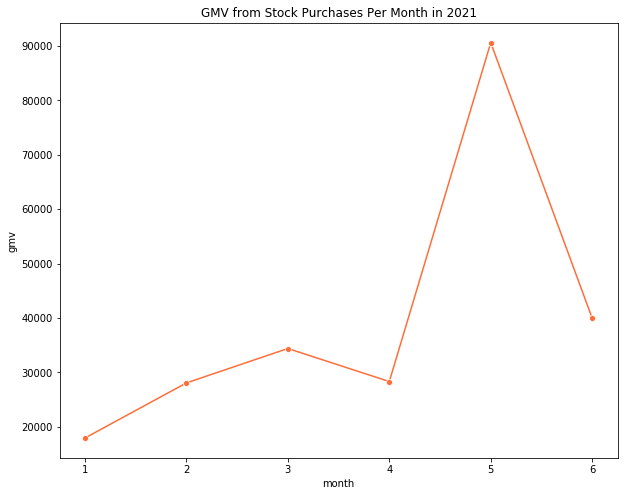

In [51]:
plt.figure(figsize=(10,8))
sns.lineplot(x=month_grp.index, y=month_grp, marker='o')
plt.title('GMV from Stock Purchases Per Month in 2021')
plt.xlabel('month')
plt.ylabel('gmv')
plt.show()

In [146]:
bbs_s[bbs_s['submitted_date'].dt.month==5].sort_values(by='price', ascending=False)[:20]

,index,seller,seller_id,buyer,buyer_id,item_id,title,brand_name,category_name,price,submitted_date
480,11370,yoogis_wholesale,209430,bag borrow steal,188669,2741481,Chanel Pink Glossy Calfskin Leather Large Boy Bag,Chanel,Shoulder Bags,2694.0,2021-05-27 17:09:00
393,10889,camille+brandear,205747,bag borrow steal,188669,2658144,CHANEL Matelasse Golden Class Navy Caviar Skin...,Chanel,Wallets,2214.0,2021-05-18 16:42:00
423,11116,huntstreetwholesale,207025,bag borrow steal,188669,2696264,Chanel New Medium Reverso Boy Bag,Chanel,Shoulder Bags,2096.0,2021-05-25 14:51:00
453,11158,eladyGZ,218741,bag borrow steal,188669,2697667,CHANEL Chain Shoulder Matrasse Lambskin Calf B...,Chanel,Handbags,1446.0,2021-05-25 17:13:00
478,11368,yoogis_wholesale,209430,bag borrow steal,188669,2741393,Chanel Gold Diamond Stitched Leather CC WOC Cl...,Chanel,Shoulder Bags,1437.0,2021-05-27 17:09:00
392,10888,camille+brandear,205747,bag borrow steal,188669,2658464,VALENTINO Candy Studs Handbag QW2B0B55XQC Blac...,Valentino,Shoulder Bags,1414.0,2021-05-18 16:42:00
418,10946,camille+brandear,205747,bag borrow steal,188669,2657858,LOUIS VUITTON Bastille MM M41164 Noir Monogram...,Louis Vuitton,Shoulder Bags,1326.0,2021-05-19 16:01:00
343,10432,camille+glt,199623,bag borrow steal,188669,2640529,Louis Vuitton Luna Epi,Louis Vuitton,Shoulder Bags,1311.0,2021-05-05 12:37:00
472,11304,camille+vtt,199622,bag borrow steal,188669,2737485,Empirente Artsy Mm,Louis Vuitton,Shoulder Bags,1301.0,2021-05-26 12:49:00
464,11296,camille+vtt,199622,bag borrow steal,188669,2737475,Vernis Montaigne Bb,Louis Vuitton,Totes,1271.0,2021-05-26 12:49:00


## Keeks

In [52]:
keeks_b=bid[bid['buyer']=='keeks handbags']
keeks_s=stock[stock['buyer']=='keeks handbags']

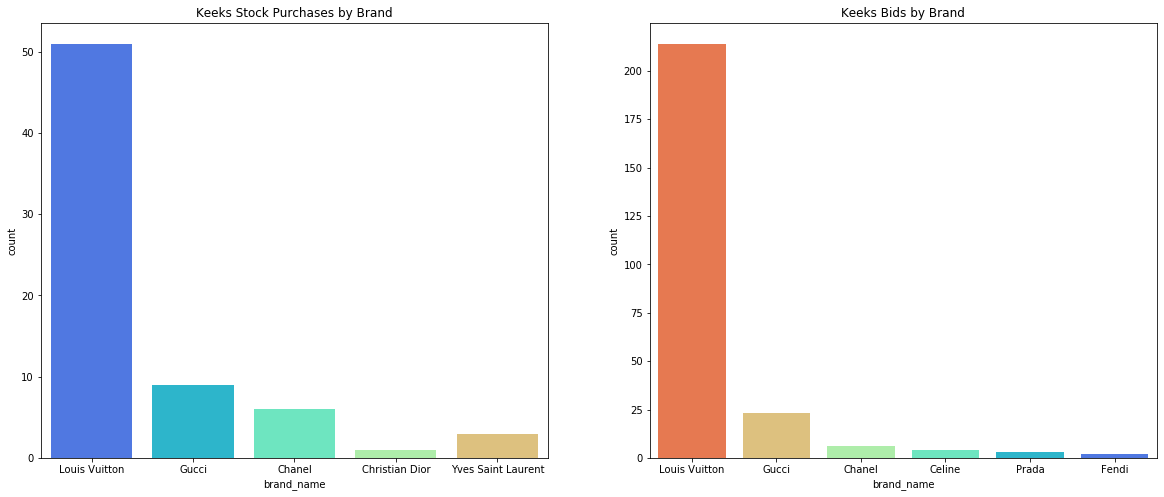

In [53]:
fig,axes=plt.subplots(1,2, figsize=(20,8))

sns.set_palette('rainbow')
ax1=sns.countplot(x='brand_name', data=keeks_s,
                  order=['Louis Vuitton', 'Gucci', 'Chanel', 'Christian Dior', 'Yves Saint Laurent'],
                  ax=axes[0]).set(title='Keeks Stock Purchases by Brand')

sns.set_palette('rainbow_r')
ax2=sns.countplot(x='brand_name', data=keeks_b,
                  order=['Louis Vuitton', 'Gucci', 'Chanel', 'Celine', 'Prada', 'Fendi'],
                  ax=axes[1]).set(title='Keeks Bids by Brand')

plt.show()

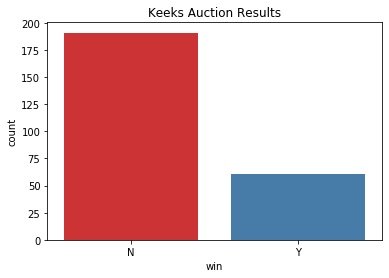

In [159]:
sns.set_palette('Set1')
sns.countplot(x='win', data=keeks_b)
plt.title('Keeks Auction Results')
plt.show()

In [64]:
keeks_item=list(keeks_b.item_id)
keeks_multi_list=multi_bid(keeks_item,bid)
keeks_multi_bid=keeks_b[keeks_b['item_id'].isin(keeks_multi_list)]

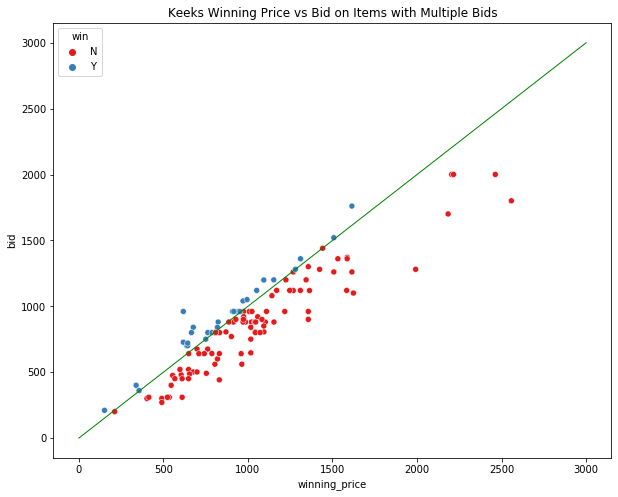

In [163]:
sns.set_palette('Set1')
plt.figure(figsize=(10,8))
sns.scatterplot(x='winning_price', y='bid', data=keeks_multi_bid, hue='win')
plt.plot([3000, 0], [3000, 0], linewidth=1, color='green')
plt.title('Keeks Winning Price vs Bid on Items with Multiple Bids')
plt.show()

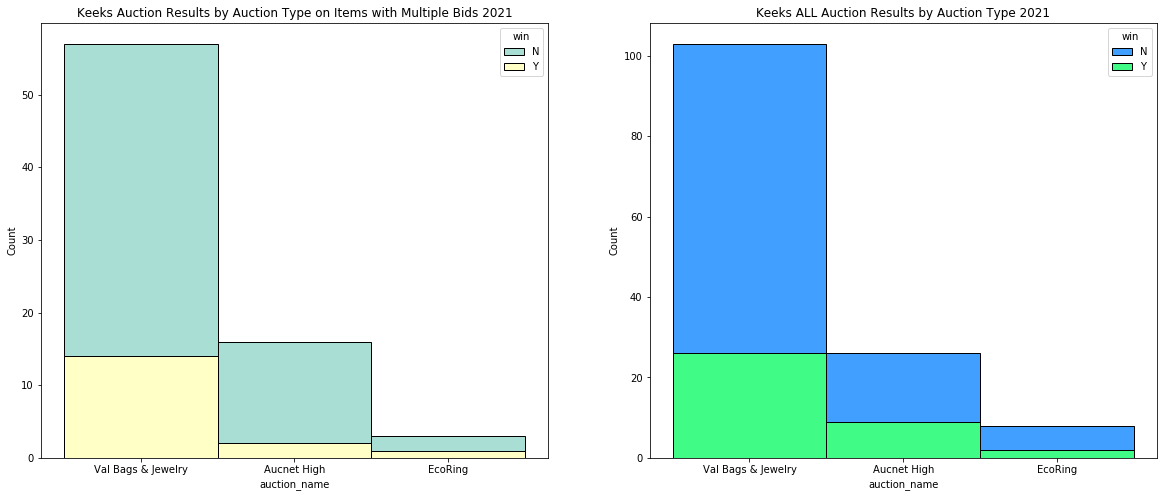

In [65]:
fig,axes=plt.subplots(1,2, figsize=(20,8))

sns.set_palette('Set3')
(sns.histplot(x='auction_name', data=keeks_multi_bid[keeks_multi_bid['bid_placed_on'].dt.year==2021], hue='win', multiple='stack', ax=axes[0])
 .set(title='Keeks Auction Results by Auction Type on Items with Multiple Bids 2021'))

sns.set_palette('gist_ncar')
(sns.histplot(x='auction_name', data=keeks_b[keeks_b['bid_placed_on'].dt.year==2021], hue='win', multiple='stack', ax=axes[1])
 .set(title='Keeks ALL Auction Results by Auction Type 2021'))
plt.show()

In [151]:
keeks_b['win'].value_counts()/(191+61)*100

N    75.793651
Y    24.206349
Name: win, dtype: float64

In [155]:
keeks_b[keeks_b['win']=='N']['within_10'].value_counts()/(55+136)*100

N    71.204188
Y    28.795812
Name: within_10, dtype: float64

In [153]:
keeks_multi_bid['win'].value_counts()/(107+28)*100

N    79.259259
Y    20.740741
Name: win, dtype: float64

In [161]:
keeks_multi_bid[keeks_multi_bid['win']=='N']['within_10'].value_counts()/(80+27)*100

N    74.766355
Y    25.233645
Name: within_10, dtype: float64

* On items with multiple bids, Keeks loses more often than wins (20.74% win rate)
* Most of these bids occur during Val Bags & Jewelry auctions; No bids in Aucnet Low
* When looking at all items, Keeks won a bit more, but still lost about 75% of auction bids

In [91]:
keeks_multi_bid[keeks_multi_bid['bid_placed_on'].dt.year==2021]['title'].value_counts()

Louis Vuitton Neverfull Mm, Monogram                                           4
Louis Vuitton Keepall Bandouliere 55                                           2
Chanel Grand Shopping Tote Gst, Caviar                                         2
Chanel Cambon Line Lambskin Leather Tote Bag Black Silver Hardware 10xxxxxx    2
Louis Vuitton Bloomsbury Pm, Damier Ebene                                      2
                                                                              ..
Louis Vuitton Pochette Metis                                                   1
Vuitton Epi Neverfull MM Tote Bag                                              1
Gucci Gg Marmont Other Line Bags / Shoulder                                    1
Louis Vuitton Monogram Looping Gm M51145 Du0015                                1
Louis Vuitton Monogram Artsy GM M40259 CA3161                                  1
Name: title, Length: 69, dtype: int64

* List of items with multiple bids that Keeks has bid on this year

In [92]:
keeks_multi_bid[(keeks_multi_bid['bid_placed_on'].dt.year==2021)&(keeks_multi_bid['win']=='Y')]['title'].value_counts()

Louis Vuitton Gaia                                                               1
Louis Vuitton Monogram Artsy GM M40259 CA3161                                    1
Louis Vuitton Damier Azur Neverfull Mm N41361 Sp2181                             1
Vuitton Damier LOUIS VUITTON Louis Vuitton Damier Ebene Neverfull MM Tote Bag    1
Louis Vuitton Monogram Neverfull GM M40990 FL2048                                1
Prada Saffiano Galeria 2WAY Handbag Red                                          1
Louis Vuitton M40157 Monogram Neverfull Gm Tote Bag                              1
Louis Vuitton Monogram Keepall Bandouliere 55 M41414 MB0041                      1
Louis Vuitton Damier Azur Neverfull Mm N51107 Tote Bag                           1
Gucci Gg Marmont Chain Shoulder Bag                                              1
Vuitton Damier Azur Totally MM Tote Bag                                          1
Louis Vuitton Damier Azur Eva Shoulder Bag                                       1
Gucc

* List of items with multiple bids that Keeks has WON this year

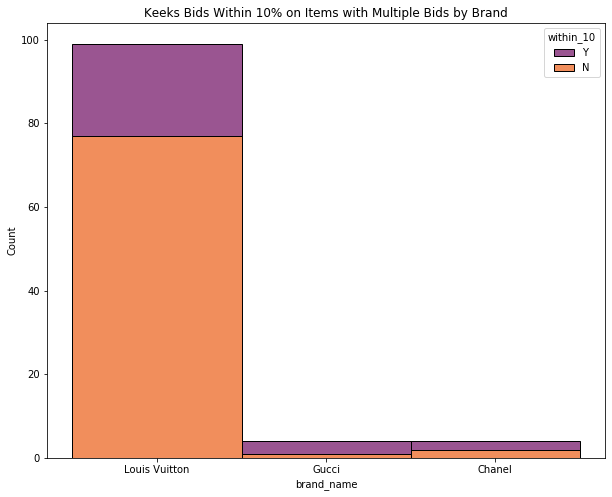

In [72]:
keeks_lost=keeks_multi_bid[keeks_multi_bid['win']=='N']
plt.figure(figsize=(10,8))
sns.histplot(x='brand_name', data=keeks_lost, hue='within_10', multiple='stack', palette='inferno')
plt.title('Keeks Bids Within 10% on Items with Multiple Bids by Brand')
plt.show()

In [170]:
keeks_b[keeks_b['win']=='Y'][['title','bid','winning_price']].sort_values(by='winning_price', ascending=False)[:20]

,title,bid,winning_price
26621,Louis Vuitton Gaia,1761,1615.0
39037,Louis Vuitton Monogram Artsy GM M40259 CA3161,1521,1508.0
27366,Gucci Gg Marmont Leather 2way Shoulder Bag Bla...,1361,1353.0
27358,Gucci Gg Marmont Leather 2way Shoulder Bag Bla...,1361,1311.0
68577,"Neverfull MM, Damier Ebene",1281,1281.0
27368,CELINE Luggage Nano shopper Canvas &amp; leath...,1201,1174.0
39035,Louis Vuitton Monogram Keepall Bandouliere 55 ...,1201,1153.0
68568,"Louis Vuitton Speedy Bandouliere 35, Damier Ebene",1200,1094.0
39022,Louis Vuitton Vernis Brea Gm M91621 Sr2142,1121,1057.0
29515,Gucci Gg Marmont Chain Shoulder Bag,1121,1052.0
